## Email CLassification

In [ ]:
#This is a classification problem because the target column contains categorical values

In [235]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
#from sklearn.linear_model import LogisticRegression 
#import warnings
#warnings.filterwarnings('ignore')
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

In [236]:
#To read the csv file into pandas dataframe
df = pd.read_csv('email_data_new.csv')

In [237]:
#To count unique values in target column (Email_type)
df['Email_type'].value_counts().unique

<bound method Series.unique of NotSpam    2788
Spam       1813
Name: Email_type, dtype: int64>

In [238]:
df.head(5)

,"word_freq_make,","word_freq_address,","word_freq_all,","word_freq_3d,","word_freq_our,","word_freq_over,","word_freq_remove,","word_freq_internet,","word_freq_order,","word_freq_mail,",...,"char_freq_;,","char_freq_(,","char_freq_[,","char_freq_!,","char_freq_$,","char_freq_#,","capital_run_length_average,","capital_run_length_longest,",capital_run_length_total,Email_type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,Spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,Spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,Spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,Spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,Spam


In [239]:
#To view the mean ,  count, standard deviation
df.describe()

,"word_freq_make,","word_freq_address,","word_freq_all,","word_freq_3d,","word_freq_our,","word_freq_over,","word_freq_remove,","word_freq_internet,","word_freq_order,","word_freq_mail,",...,"word_freq_conference,","char_freq_;,","char_freq_(,","char_freq_[,","char_freq_!,","char_freq_$,","char_freq_#,","capital_run_length_average,","capital_run_length_longest,",capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [240]:
#To view the columns
df.columns

Index(['word_freq_make,', 'word_freq_address,', 'word_freq_all,',
       'word_freq_3d,', 'word_freq_our,', 'word_freq_over,',
       'word_freq_remove,', 'word_freq_internet,', 'word_freq_order,',
       'word_freq_mail,', 'word_freq_receive,', 'word_freq_will,',
       'word_freq_people,', 'word_freq_report,', 'word_freq_addresses,',
       'word_freq_free,', 'word_freq_business,', 'word_freq_email,',
       'word_freq_you,', 'word_freq_credit,', 'word_freq_your,',
       'word_freq_font,', 'word_freq_000,', 'word_freq_money,',
       'word_freq_hp,', 'word_freq_hpl,', 'word_freq_george,',
       'word_freq_650,', 'word_freq_lab,', 'word_freq_labs,',
       'word_freq_telnet,', 'word_freq_857,', 'word_freq_data,',
       'word_freq_415,', 'word_freq_85,', 'word_freq_technology,',
       'word_freq_1999,', 'word_freq_parts,', 'word_freq_pm,',
       'word_freq_direct,', 'word_freq_cs,', 'word_freq_meeting,',
       'word_freq_original,', 'word_freq_project,', 'word_freq_re,',
       '

In [241]:
#To view the column datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   word_freq_make,              4601 non-null   float64
 1   word_freq_address,           4601 non-null   float64
 2   word_freq_all,               4601 non-null   float64
 3   word_freq_3d,                4601 non-null   float64
 4   word_freq_our,               4601 non-null   float64
 5   word_freq_over,              4601 non-null   float64
 6   word_freq_remove,            4601 non-null   float64
 7   word_freq_internet,          4601 non-null   float64
 8   word_freq_order,             4601 non-null   float64
 9   word_freq_mail,              4601 non-null   float64
 10  word_freq_receive,           4601 non-null   float64
 11  word_freq_will,              4601 non-null   float64
 12  word_freq_people,            4601 non-null   float64
 13  word_freq_report, 

In [242]:
#This two columns were dropped because they contain string values and only numeric values can work in the model 
df = df.drop(columns= ['word_freq_hpl,','word_freq_hp,' ], axis =1)


In [243]:
#To check columns with null values
df.isnull().sum()

word_freq_make,                  0
word_freq_address,               0
word_freq_all,                   0
word_freq_3d,                    0
word_freq_our,                   0
word_freq_over,                  0
word_freq_remove,                0
word_freq_internet,              0
word_freq_order,                 0
word_freq_mail,                  0
word_freq_receive,               0
word_freq_will,                  0
word_freq_people,                0
word_freq_report,                0
word_freq_addresses,             0
word_freq_free,                211
word_freq_business,              0
word_freq_email,                 0
word_freq_you,                   0
word_freq_credit,                0
word_freq_your,                  0
word_freq_font,                  0
word_freq_000,                   0
word_freq_money,                 0
word_freq_george,                0
word_freq_650,                   0
word_freq_lab,                   0
word_freq_labs,                  0
word_freq_telnet,   

In [244]:
#To fill the null values in word_freq_free, calculate the mean and use it to fill the null values
wf_mean = round( df['word_freq_free,'].mean(), 2)
wf_mean

0.26

In [245]:
#fillin the missing value with the mean
df['word_freq_free,'].fillna(wf_mean, inplace = True)

In [246]:
#No null value is available
df.isnull().sum()

word_freq_make,                0
word_freq_address,             0
word_freq_all,                 0
word_freq_3d,                  0
word_freq_our,                 0
word_freq_over,                0
word_freq_remove,              0
word_freq_internet,            0
word_freq_order,               0
word_freq_mail,                0
word_freq_receive,             0
word_freq_will,                0
word_freq_people,              0
word_freq_report,              0
word_freq_addresses,           0
word_freq_free,                0
word_freq_business,            0
word_freq_email,               0
word_freq_you,                 0
word_freq_credit,              0
word_freq_your,                0
word_freq_font,                0
word_freq_000,                 0
word_freq_money,               0
word_freq_george,              0
word_freq_650,                 0
word_freq_lab,                 0
word_freq_labs,                0
word_freq_telnet,              0
word_freq_857,                 0
word_freq_

## Exploratory data analysis

<Axes: >

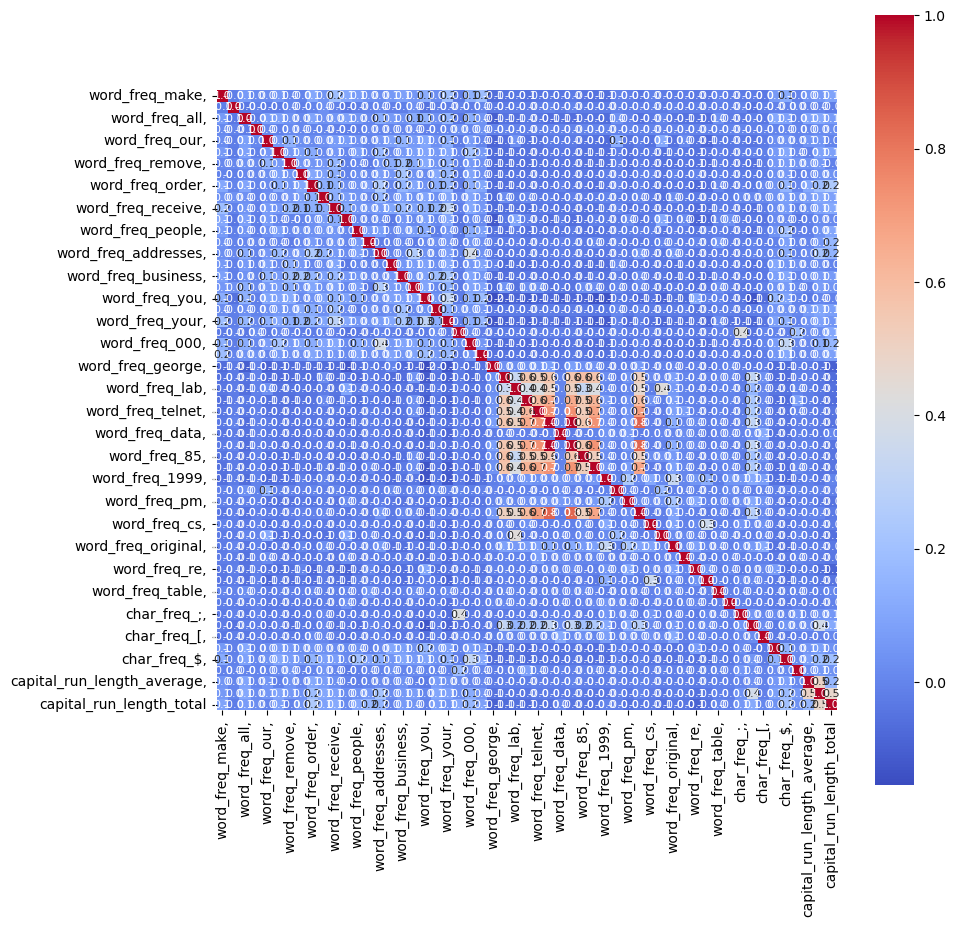

In [247]:
#To find the correlation between features
#To show the correlation between other attributes and  N02
correlation = df.corr()
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,cbar=True, square =True,fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')

In [248]:
#The target column (Email_type) contains categorical values needs to convert to numerical values
#using labelEncoder 
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [249]:
df['Email_type'] = le.fit_transform(df['Email_type'])

<Axes: ylabel='Frequency'>

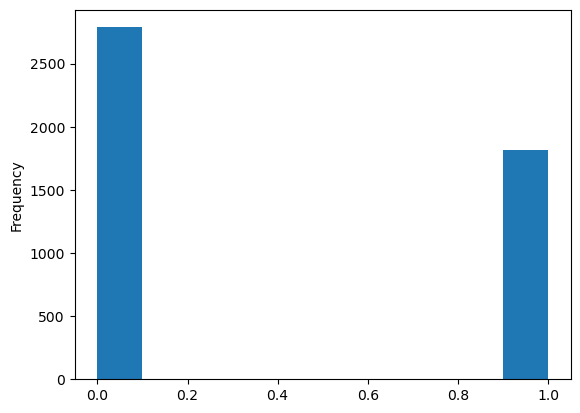

In [250]:
#Values in target are  numerical values
df['Email_type'].plot(kind='hist')

Text(0.5, 1.0, 'Email_type')

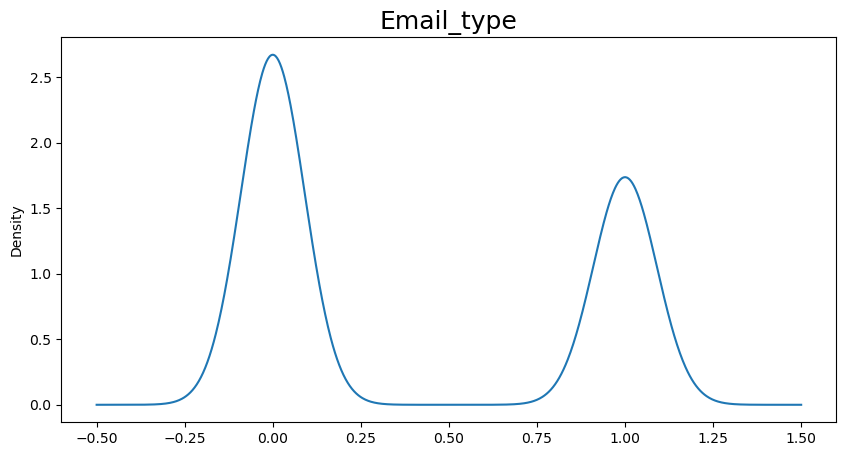

In [251]:
#To plot  distribution of Target column (Email_type) values
plt.figure(num=2, figsize=(10,5))
df['Email_type'].plot.kde()
plt.title('Email_type', size = 18)

## Data Analysis

In [252]:
#Divide the dataset into feature X  and the target y
X = df.drop(columns =['Email_type'], axis = 1)
y = df['Email_type']


In [253]:
#To view the shape of X and y
print(X.shape ,'\n',y.shape)

(4601, 55) 
 (4601,)


In [254]:
#Split data into training and test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [255]:
#Create a function which to classify each model and perform a cross validation on the training data 
#To divide the dataset into train and test 
#using 70 % for training and 30% for testing
#To split into training and test data
#Create a model to for cross validation on the various models
#Shows the accuracy on test dataset 
# cross validation on train dataset
def classify(model):
 
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, x_train, y_train, cv=5)
    print('CV Score:', np.mean(score))

In [256]:
#for Logistic Regression
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
classify(LRmodel)


Accuracy: 0.9123823316437364
CV Score: 0.9111801242236025


In [257]:
#Using RandomForestClassifier with hyperparameters
from sklearn.ensemble import RandomForestClassifier
RFmodel =  RandomForestClassifier(n_estimators =12, max_depth =20)
classify(RFmodel)

Accuracy: 0.9478638667632151
CV Score: 0.9350931677018632


In [258]:
#USING ExtraTreesClassifier with hyperparameters
from sklearn.ensemble import ExtraTreesClassifier
EXTmodel = ExtraTreesClassifier(verbose = 0, n_estimators = 20, max_depth = 20)
classify(EXTmodel)

Accuracy: 0.9232440260680667
CV Score: 0.927639751552795


In [259]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [260]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [261]:
#Using CatBoostClassifier
from catboost import CatBoostClassifier
CATmodel = CatBoostClassifier(verbose=0)
classify(CATmodel)

Accuracy: 0.9536567704561911
CV Score: 0.9478260869565218


In [262]:
#CatBoostClassifier 
#Accuracy on test data : 95%
#Cross validation on training dataset: 94%

In [263]:
#to predict on test 
#CatBoostClassifier gave the highest accuracy on test data and cross validation score was high on train data

CATdata_prediction = CATmodel.predict(x_test)
print(CATdata_prediction)

[0 0 0 ... 1 1 0]


In [264]:
#To Show actual value and predicted value in dataframe
view_pred = pd.DataFrame(list(zip(CATdata_prediction, y_test)))
view_pred.columns = ['Prediction', 'Actual values']
view_pred.head(10)

,Prediction,Actual values
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [265]:
#To generate the precision, recall, f1-score, support
target_names = ['Spam', 'NotSpam']
print(metrics.classification_report(y_test, CATdata_prediction, target_names =target_names))

              precision    recall  f1-score   support

        Spam       0.94      0.98      0.96       804
     NotSpam       0.97      0.92      0.94       577

    accuracy                           0.95      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381



In [266]:
#To generate the confusion matrix
print(metrics.confusion_matrix(y_test,CATdata_prediction))

[[787  17]
 [ 47 530]]


In [ ]:
# Create a labeled confusion matrix
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

In [ ]:

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="coolwarm", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [267]:
#From the confusion matrix
#True positive: 787
#False positive : 47
#True Negative : 530
#False Negative : 17


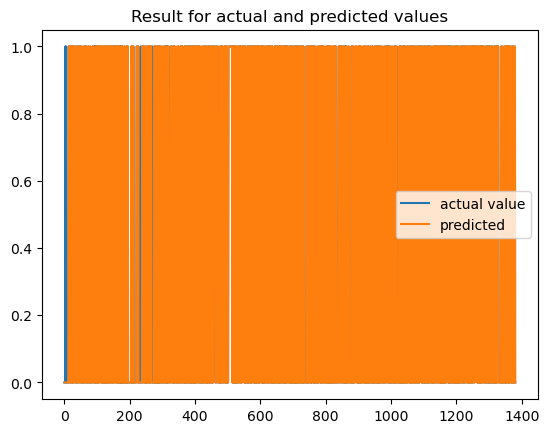

In [268]:
#Plot actual value againt the predicted value
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label = 'actual value')
plt.plot(x_ax, CATdata_prediction, label= 'predicted')
plt.title('Result for actual and predicted values')
plt.legend()
plt.show()

In [269]:
#To test GridSearch
#To test with GridSearch on RandomForestClassifier
#To Test with Gridsearch model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [270]:
grid_search.best_score_

0.9347826086956521

In [271]:
#With RandomForest GridSearch
#Accuracy: 93%


In [272]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

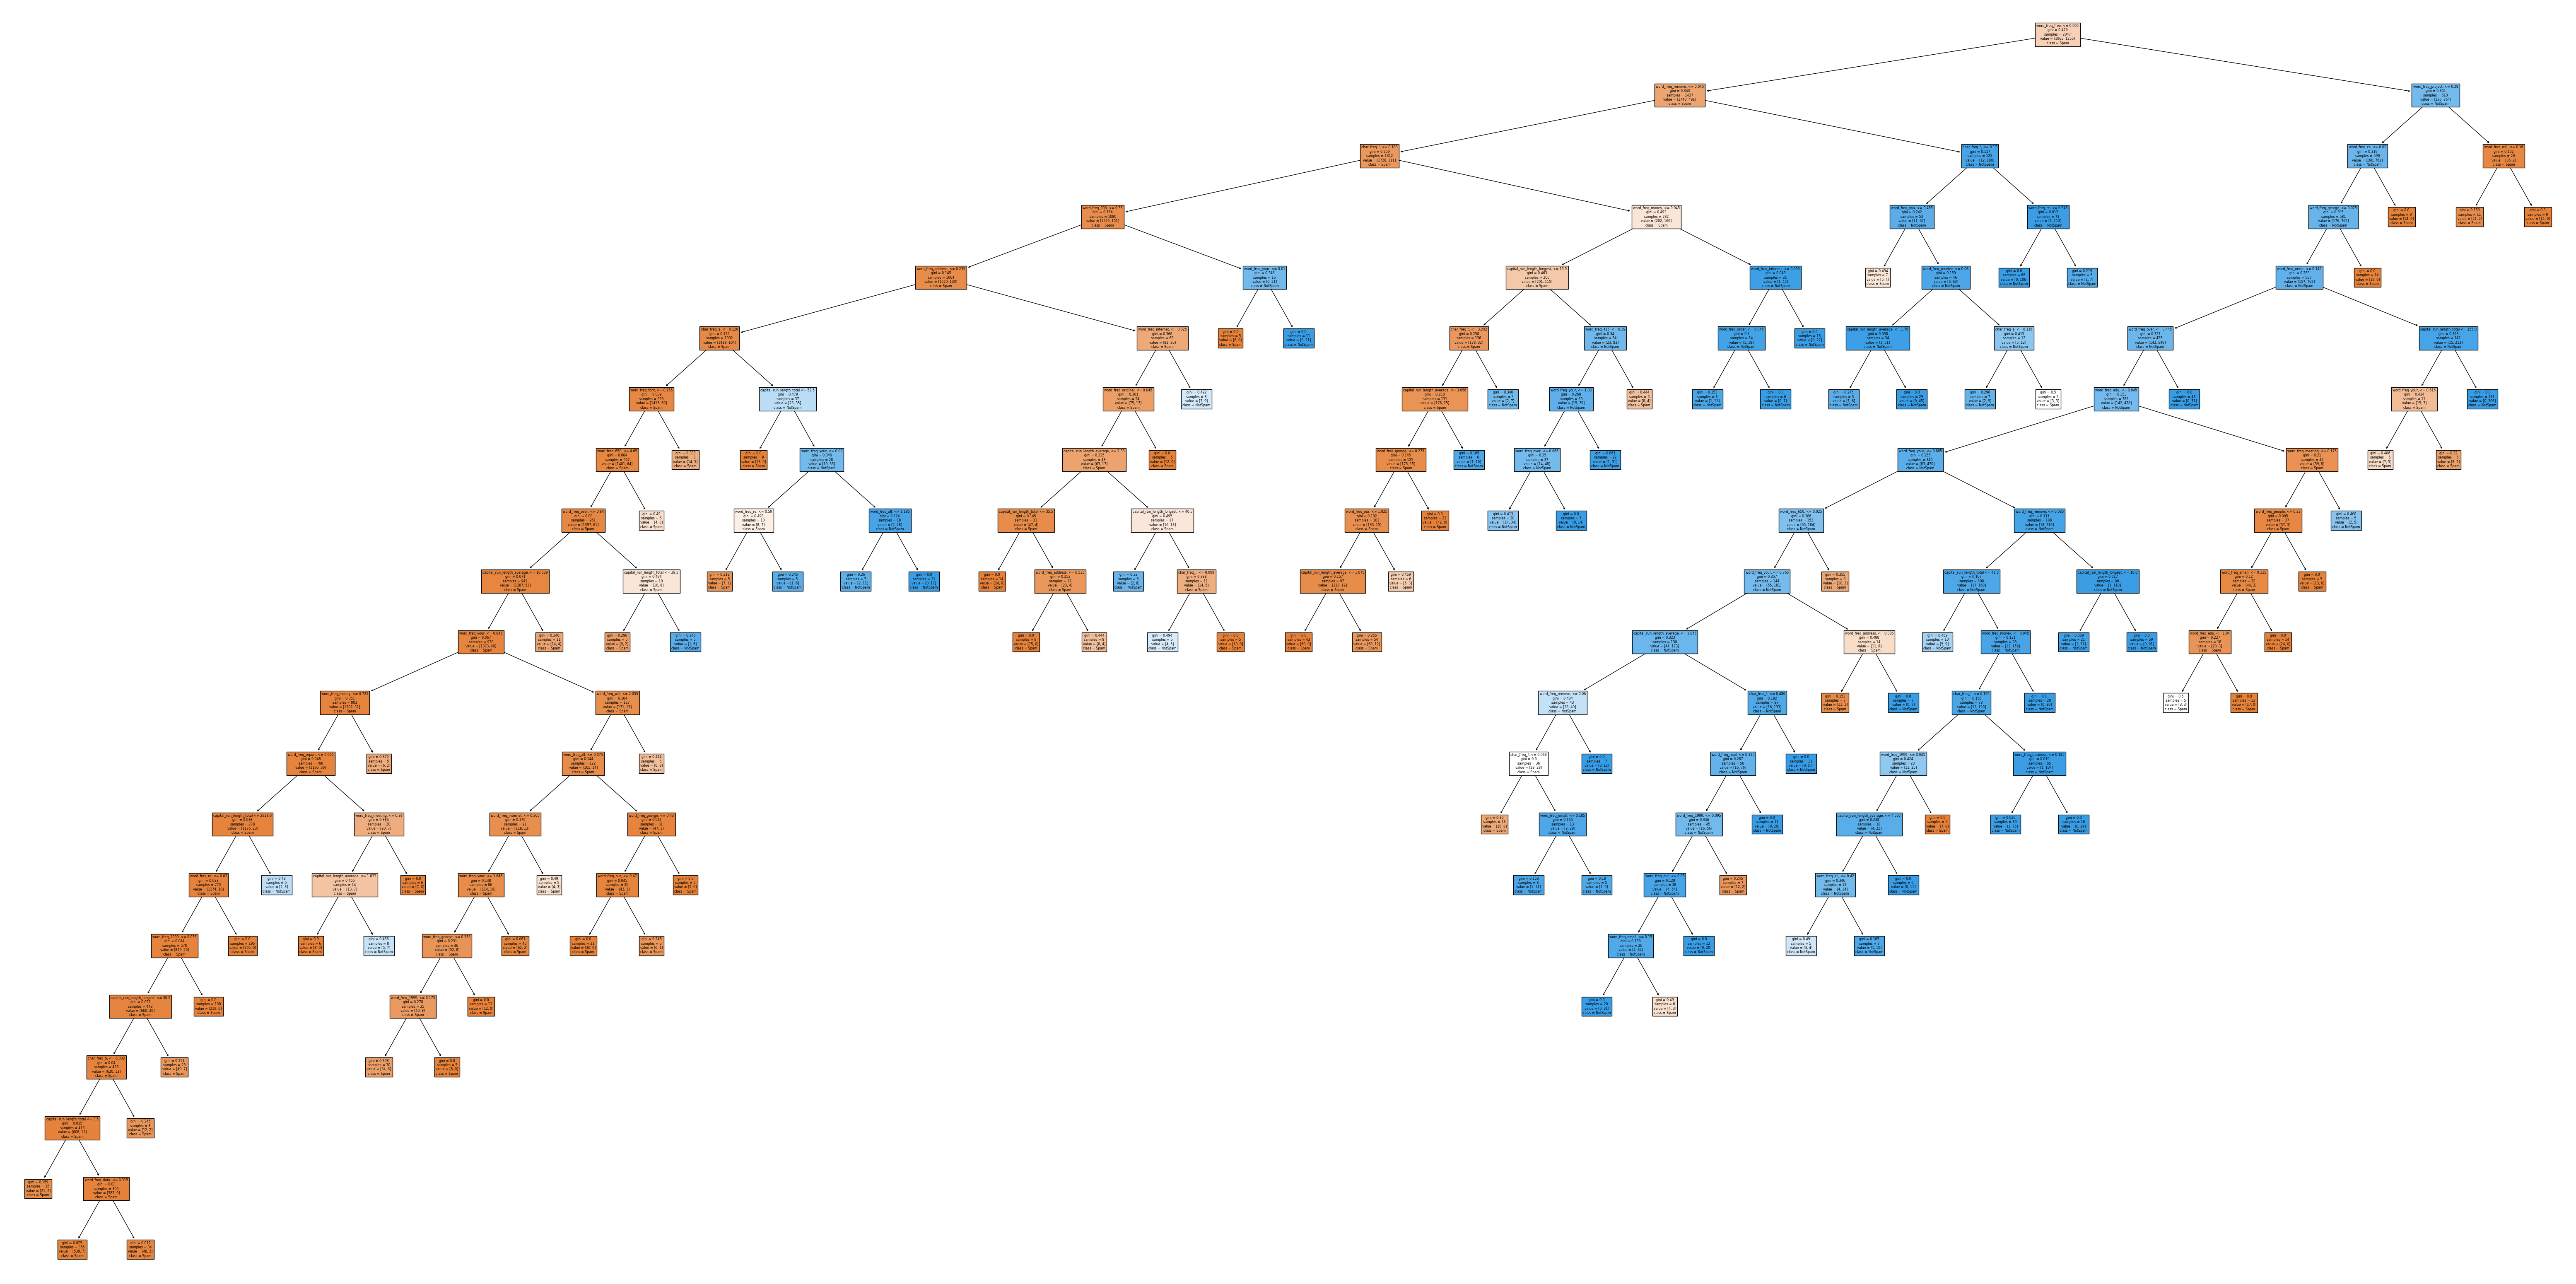

In [273]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[20], feature_names = df.columns,class_names=['Spam', "NotSpam","HELP"],filled=True);

In [275]:
#In conlusion CatBoostClassifier gave the highest accuracy among all the Ensemble models 
#The f1 score for spam : 96%
#The f1-score for NotSpam: 94%

#Accuracy on test dataset : 95%
#Cross validation on training dataset: 94%
# And
#From the confusion matrix
#True positive: 787
#False positive : 47
#True Negative : 530
#False Negative : 17